<a href="https://colab.research.google.com/github/vangelis-michael/Deep-learning-/blob/master/Generated_music_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MUSIC GENERATION USING RECURRENT NEURAL NETWORK

In [0]:
! git clone https://github.com/aamini/introtodeeplearning_labs.git
% cd introtodeeplearning_labs
! git pull
% cd ..

Cloning into 'introtodeeplearning_labs'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 1072 (delta 5), reused 5 (delta 2), pack-reused 1059
Receiving objects: 100% (1072/1072), 121.30 MiB | 22.78 MiB/s, done.
Resolving deltas: 100% (594/594), done.
/content/introtodeeplearning_labs
Already up to date.
/content


In [0]:
cd lab1


/content/introtodeeplearning_labs/lab1


In [0]:
ls

abc2wav*     Part1_tensorflow.ipynb                 README.md
data/        Part1_tensorflow_solution.ipynb        tmp.abc
img/         Part2_music_generation.ipynb           util.py
__init__.py  Part2_music_generation_solution.ipynb


In [0]:
import tensorflow as tf
tf.enable_eager_execution()

import numpy as np
import os
import time
import functools
from IPython import display as ipythondisplay

# from introtodeeplearning_labs import util

is_correct_tf_version = '1.13.0' in tf.__version__
assert is_correct_tf_version, "Wrong tensorflow version ({}) installed".format(tf.__version__)

is_eager_enabled = tf.executing_eagerly()
assert is_eager_enabled, "Tensorflow eager mode is not enabled"

'''If this does not return true on Colaboratory, go to runtime -> change runtime type -> GPU or see a TA'''
# assert tf.test.is_gpu_available()

!apt-get install abcmidi timidity > /dev/null 2>&1

In [0]:
!pip install tensorflow==1.13.0rc0

    100% |████████████████████████████████| 92.6MB 380kB/s 
    100% |████████████████████████████████| 3.1MB 12.2MB/s 
  Found existing installation: tensorboard 1.13.0
    Uninstalling tensorboard-1.13.0:
      Successfully uninstalled tensorboard-1.13.0
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


In [0]:
path_to_file = tf.keras.utils.get_file('irish.abc', 'https://raw.githubusercontent.com/aamini/introtodeeplearning_labs/2019/lab1/data/irish.abc')

204800/197618 [===============================] - 0s 0us/step


In [0]:
text = open(path_to_file).read()
#length of text is the nnumber of characters in it
print('length of text: {} characters'.format(len(text)))

length of text: 197618 characters


In [0]:
import util

SyntaxError: ignored

In [0]:
%cat util.py

import os
import subprocess
import regex as re


def extract_song_snippet(generated_text):
    pattern = '\n\n(.*?)\n\n'
    search_results = re.findall(pattern, generated_text, overlapped=True, flags=re.DOTALL)
    songs = [song for song in search_results]
    print "Found {} possible songs in generated texts".format(len(songs))
    return songs

def save_song_to_abc(song, filename="tmp"):
    save_name = "{}.abc".format(filename)
    with open(save_name, "w") as f:
        f.write(song)
    return filename

def abc2wav(abc_file):
    path_to_tool = './introtodeeplearning_labs/lab1/abc2wav'
    cmd = "{} {}".format(path_to_tool, abc_file)
    return os.system(cmd)

def play_wav(wav_file):
    from IPython.display import Audio
    return Audio(wav_file)

def play_generated_song(generated_text):
    songs = extract_song_snippet(generated_text)
    if len(songs) == 0:
        print "No valid songs found in generated text. Try training the model longer or increasing the amount of generate

In [0]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  

In [0]:
import os
import subprocess
import regex as re


def extract_song_snippet(generated_text):
    pattern = '\n\n(.*?)\n\n'
    search_results = re.findall(pattern, generated_text, overlapped=True, flags=re.DOTALL)
    songs = [song for song in search_results]
    print("Found {} possible songs in generated texts".format(len(songs)))
    return songs

def save_song_to_abc(song, filename="tmp"):
    save_name = "{}.abc".format(filename)
    with open(save_name, "w") as f:
        f.write(song)
    return filename

def abc2wav(abc_file):
    path_to_tool = './introtodeeplearning_labs/lab1/abc2wav'
    cmd = "{} {}".format(path_to_tool, abc_file)
    return os.system(cmd)

def play_wav(wav_file):
    from IPython.display import Audio
    return Audio(wav_file)

def play_generated_song(generated_text):
    songs = extract_song_snippet(generated_text)
    if len(songs) == 0:
        print("No valid songs found in generated text. Try training the model longer or increasing the amount of generated music to ensure complete songs are generated!")

    for song in songs:
        basename = save_song_to_abc(song)
        ret = abc2wav(basename+'.abc')
        if ret == 0: #did not suceed
            return play_wav(basename+'.wav')
    print("None of the songs were valid, try training longer to improve syntax.")

In [0]:
play_generated_song(text)

Found 816 possible songs in generated texts
None of the songs were valid, try training longer to improve syntax.


In [0]:
print(text[:250])

X:1
T:Alexander's
Z: id:dc-hornpipe-1
M:C|
L:1/8
K:D Major
(3ABc|dAFA DFAd|fdcd FAdf|gfge fefd|(3efe (3dcB A2 (3ABc|!
dAFA DFAd|fdcd FAdf|gfge fefd|(3efe dc d2:|!
AG|FAdA FAdA|GBdB GBdB|Acec Acec|dfaf gecA|!
FAdA FAdA|GBdB GBdB|Aceg fefd|(3efe dc d2:


In [0]:
# The unique characters in the file
vocab = sorted(set(text))
print('{} unique characters'.format(len(vocab)))

83 unique characters


In [0]:
# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
text_as_int = np.array([char2idx[c] for c in text])

'''TODO: create a mapping from indices to characters'''
idx2char = np.array(vocab)

In [0]:
print('{}')
for char, _ in zip(char2idx, range(20)):
  print(' {:4s}: {:3d},'.format(repr(char), char2idx[char]))

{}
 '\n':   0,
 ' ' :   1,
 '!' :   2,
 '"' :   3,
 '#' :   4,
 "'" :   5,
 '(' :   6,
 ')' :   7,
 ',' :   8,
 '-' :   9,
 '.' :  10,
 '/' :  11,
 '0' :  12,
 '1' :  13,
 '2' :  14,
 '3' :  15,
 '4' :  16,
 '5' :  17,
 '6' :  18,
 '7' :  19,


In [0]:
print('{} ------ characters mapped to int ------ > {}'.format(repr(text[:13]), text_as_int[:13]))

'X:1\nT:Alexand' ------ characters mapped to int ------ > [49 22 13  0 45 22 26 67 60 79 56 69 59]


In [0]:
# The maximum length sentence we want for a single input in characters
seq_length = 100
examples_per_epoch = len(text)//seq_length

# Create training examples / targets
# Note how we are using the 'tf.data' module!
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

'''TODO: use the batch function to generate sequences of the desired size'''
'''Hint: you'll want to set the drop remainder=True'''
sequences = char_dataset.batch(seq_length+1, drop_remainder= True)

In [0]:
'''Define a function that takes a sequence (chunk) and outputs both the input and target text sequences'''
'''Hint: consider the "Hello" example'''
def split_input_target(chunk):
  input_text = chunk[:-1]
  target_text = chunk[1:]
  return input_text, target_text

'''TODO: use the map method to apply our function to the list of sequences to generate the dataset!'''
dataset = sequences.map(split_input_target)

In [0]:
for input_example, target_example in dataset.take(1):
  
  for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("Step {:4d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Instructions for updating:
Colocations handled automatically by placer.
Step    0
  input: 49 ('X')
  expected output: 22 (':')
Step    1
  input: 22 (':')
  expected output: 13 ('1')
Step    2
  input: 13 ('1')
  expected output: 0 ('\n')
Step    3
  input: 0 ('\n')
  expected output: 45 ('T')
Step    4
  input: 45 ('T')
  expected output: 22 (':')


In [0]:
# Batch size
BATCH_SIZE = 64
steps_per_epoch = examples_per_epoch//BATCH_SIZE

# Buffer size is similar to a queue size 
# This defines a manageable data size to put into memory, where elements are shuffled
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Examine the dimensions of the dataset
dataset

<DatasetV1Adapter shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

### Define the RNN model

In [0]:
# length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# The number of RNN units
'''TODO: after running through the lab, try changing the number of units in the network to see how it affects performance'''
rnn_units = 1024

In [0]:
if tf.test.is_gpu_available():
  LSTM = tf.keras.layers.CuDNNLSTM
else:
  LSTM = functools.partial(tf.keras.layers.LSTM, recurrent_activation='sigmoid')
  
LSTM = functools.partial(LSTM, return_sequences=True, recurrent_initializer='glorot_uniform', stateful=True)

In [0]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                batch_input_shape=[batch_size, None]),
      LSTM(rnn_units),
      tf.keras.layers.Dense(vocab_size)
  ])
  
  # Define the dimensionality of the RNN
  # Define the dimensionality of the Dense layer
  return model

In [0]:
# Call the build_model function to instantiate the RNN model
model = build_model(
    vocab_size = len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units, 
    batch_size=BATCH_SIZE)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (64, None, 256)           21248     
_________________________________________________________________
lstm (LSTM)                  (64, None, 1024)          5246976   
_________________________________________________________________
dense (Dense)                (64, None, 83)            85075     
Total params: 5,353,299
Trainable params: 5,353,299
Non-trainable params: 0
_________________________________________________________________


In [0]:
for input_example_batch, target_example_batch in dataset.take(1):
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 83) # (batch_size, sequence_length, vocab_size)


In [0]:
sampled_indices = tf.random.multinomial(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis= -1).numpy()

Instructions for updating:
Use tf.random.categorical instead.


In [0]:
sampled_indices

array([ 1, 49, 44, 36, 80, 32, 42, 73, 69, 45, 57, 82, 76, 42, 65, 26,  3,
       40, 34, 35, 59, 80, 37, 52, 19, 15, 77, 11, 51, 42, 36, 39, 49, 10,
       55, 38, 81, 78, 79, 74,  7, 68, 64, 26, 38, 82, 50, 15, 20, 73, 74,
       59, 33, 32, 56, 13, 36, 65, 47,  2, 13, 78, 15, 32,  8, 48, 61,  1,
       28, 46, 10, 57, 36, 12,  2, 51, 41,  2, 67, 40, 24, 43, 61, 37, 65,
       63, 35, 38, 46, 25, 44, 47, 25, 50, 32, 81, 22,  0,  1, 76])

In [0]:
print(" Input: \n", repr("".join(idx2char[input_example_batch[0]])))
print()
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices ])))

 Input: 
 '|BA A2:|!\nce fa/f/|ec BA|ce fa/f/|ec B2|!\nce fa/f/|ec BA|ef/e/ cB|BA A2:|!\n\nX:17\nT:Farewell to Whisk'

Next Char Predictions: 
 ' XSKyGQrnTb|uQjA"OIJdyL[73v/ZQKNX._Mzwxs)miAM|Y38rsdHGa1KjV!1w3G,Wf CU.bK0!ZP!lO=RfLjhJMU>SV>YGz:\n u'


### Training the model

In [0]:
def compute_loss(labels, logits):
  return tf.keras.backend.sparse_categorical_crossentropy(labels, logits, from_logits=True)

'''TODO: compute the loss using the example batch and predictions from above'''
example_batch_loss = compute_loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 100, 83)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.4186854


In [0]:
import matplotlib.pyplot as plt
import time

class PeriodicPlotter:
  def __init__(self, sec, xlabel='', ylabel='', scale=None):
    from IPython import display as ipythondisplay
    import matplotlib.pyplot as plt
    import time
    
    self.xlabel = xlabel
    self.ylabel = ylabel
    self.sec = sec
    self.scale = scale
    
    self.tic = time.time()
    
  def plot(self, data):
    if time.time() - self.tic > self.sec:
      plt.cla()    

      if self.scale is None:
        plt.plot(data)
      elif self.scale == 'semilogx':
        plt.semilogx(data)
      elif self.scale == 'semilogy':
        plt.semilogy(data)
      elif self.scale == 'loglog':
        plt.loglog(data)
      else:
        raise ValueError("unrecognized parameter scale {}".format(self.scale))

      plt.xlabel(self.xlabel); plt.ylabel(self.ylabel)
      ipythondisplay.clear_output(wait=True)
      ipythondisplay.display(plt.gcf())

      self.tic = time.time()

In [0]:
def custom_progress_text(message):
  import progressbar
  from string import Formatter

  message_ = message.replace('(', '{')
  message_ = message_.replace(')', '}')

  keys = [key[1] for key in Formatter().parse(message_)]

  ids = {}
  for key in keys:
    if key is not None:
      ids[key] = float('nan')

  msg = progressbar.FormatCustomText(message, ids)
  return msg

def create_progress_bar(text=None):
  import progressbar
  if text is None:
    text = progressbar.FormatCustomText('')
  bar = progressbar.ProgressBar(widgets=[
      progressbar.Percentage(),
      progressbar.Bar(),
      progressbar.AdaptiveETA(), '  ',
      text,
  ])
  return bar

def display_model(model):
  tf.keras.utils.plot_model(model,
                            to_file='tmp.png',
                            show_shapes=True)
  from IPython.display import Image
  return Image('tmp.png')

def plot_sample(x,y,vae):
    plt.figure(figsize=(2,1))
    plt.subplot(1, 2, 1)
    idx = np.where(y.numpy()==1)[0][0]
    plt.imshow(x[idx])
    plt.grid(False)

    plt.subplot(1, 2, 2)
    plt.imshow(vae(x)[idx])
    plt.grid(False)

    plt.show()

class LossHistory:
  def __init__(self, smoothing_factor=0.0):
    self.alpha = smoothing_factor
    self.loss = []
  def append(self, value):
    self.loss.append( self.alpha*self.loss[-1] + (1-self.alpha)*value if len(self.loss)>0 else value )
  def get(self):
    return self.loss

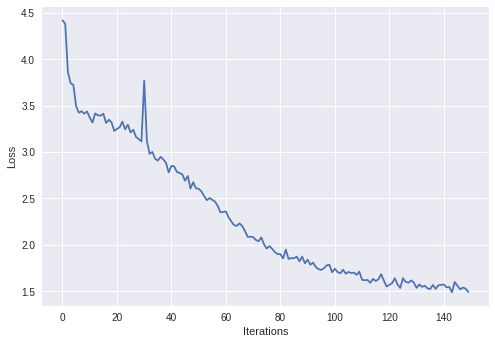

N/A%|#                                              |Time:  0:08:24  Loss: 1.49


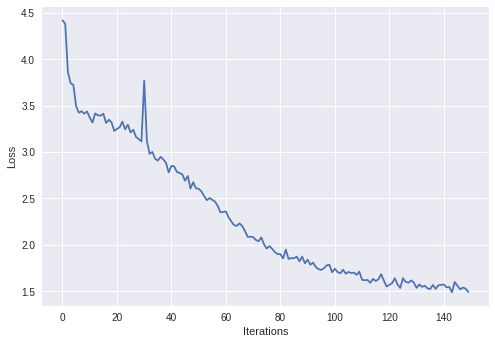

In [0]:
# Training step
EPOCHS = 5
'''TODO: experiment with different optimizers'''
'''How does changing this affects the network's performance'''
optimizer = tf.train.AdamOptimizer() #TODO
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

history = []
plotter = PeriodicPlotter(sec=1, xlabel='Iterations', ylabel='Loss')
for epoch in range(EPOCHS):
  # Initialize the hidden state at the start of very epoch; initially it is none
  hidden = model.reset_states()
  
  # Enumerate the dataset for use in training
  custom_msg = custom_progress_text("Loss: %(loss)2.2f")
  bar = create_progress_bar(custom_msg)
  for inp, target in bar(dataset):
    # Use tf.GradientTape()
    with tf.GradientTape() as tape:
      # feed the current input into the model and generate predictions
      predictions = model(inp) #
      # Compute the loss!
      loss = compute_loss(target, predictions)
      
    # Now compute the gradients and try to minimize
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    # Update the progress bar
    history.append(loss.numpy().mean())
    custom_msg.update_mapping(loss=history[-1])
    plotter.plot(history)
    
  # Update the model with the changed weights!
  model.save_weights(checkpoint_prefix.format(epoch=epoch))

In [0]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size = 1)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (1, None, 256)            21248     
_________________________________________________________________
lstm_1 (LSTM)                (1, None, 1024)           5246976   
_________________________________________________________________
dense_1 (Dense)              (1, None, 83)             85075     
Total params: 5,353,299
Trainable params: 5,353,299
Non-trainable params: 0
_________________________________________________________________


In [0]:
def generate_text(model, start_string, generation_length= 1000):
  # Evaluation step (generating ABC text sing the learned RNN model)
  # Convert the start string to numbers (vectorize)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)
  
  # Empty string to store our results
  text_generated = []
  
  # Here batch size == 1
  model.reset_states()
  bar = create_progress_bar()
  for i in bar(range(generation_length)):
    # Evaluate the inputs and generate the next character predictions
    predictions = model(input_eval)
    
    # Remove the batch dimension
    predictions = tf.squeeze(predictions, 0)
    
    # Use a multinomial distribution to sample
    predicted_id = tf.multinomial(predictions, num_samples=1)[-1,0].numpy()
    
    # Pass the prediction along with the previous hidden state as the next inputs to the model
    input_eval = tf.expand_dims([predicted_id], 0)
    
    # Add the predicted character to the generated text
    # Hint: consider what format the prediction is in, vs. the output
    text_generated.append(idx2char[predicted_id])
    
  return (start_string + ''.join(text_generated))

In [0]:
# Use the model to generate ABC format text!
# As you may have noticed, ABC files start with 'X' - this may be a good start string
text = generate_text(model, start_string="X")

100%|#########################################################|Time:  0:00:20  


In [0]:
play_generated_song(text)

Found 5 possible songs in generated texts
None of the songs were valid, try training longer to improve syntax.


In [0]:
print(text)

X:|!
GGB cBA|FGA D2:|!
dB|fgf gde|BAA EDA|GAG2 dABA|AFB2 BdA2|!
BAAB AGE2|fBdB G3E|Bd^c dBfiganc yag1 g^^F|]!

X:33 [iwlTy Rdoe
Z: Cd:dc-jian-8
M:6/8
K:G/Doriaf efed|dAFF|GBA|BAF F2:|!
d|gBde GBA|cBec dcBA|defd cfd|AFA FAF|ABcd e2BA|!
dfec ABGB|BAFG A2dc|E2FG FAGA|ddeg ABd:|!

X:2
9
M:uinoror'
Z: id:dc-heilan23
M:3/4
L:1/8
K:G Mojor
d2|cABG BcdB|d3B ABgg|f=e^c2 efed gabg|efbe cBA2|b3a d2gf|fdec d32|!
A3ec FAGB|cAFB dBfe|dgcB B3:|!
B2G A2G:|!
fddg fdfg|gABA e3B|dcBAG EDE2|]!

X:143
T:Rigkt2 Brtp o
Z: id:dc-reelge-11
M:C
L:1/8
K:D Major
an
fe dfe|d2G dGF|A2c dBB|AFG AFD|FGB ACF|G2E DFG|D2D DDD|!
D2A B22F|GFAG BAF|cege gdBd|cABE BAFB|A3e (ABcg|efef gbaf|afa=g: !
fea^c dGEG|ABdc efec|BGBF FGEF|!
ecde BBAG|FAGF A2:|!

X:275
T:Coenn!
T: id:dc-pell-475
M:C
L:1/8
K:G MajoreFae|efdB cABc|dec4 AFFE|D2GA AGBc|!

X:822
T:wllgekraionr
Z: id:dc-jig-j33 iajbg efg|egd fed|fef g2:|!
g|afef gded|Bdc2 cefg|!
dafg baga|gaaf efd^c|cAe2 a2bg|f2ag abgg|!
BAA2 FGAF|GGBd Bdce|dece ABc-|!

X:133
T:Jxwiss Rubeeu